In [1]:
import numpy as np
import os
import sys
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, LeakyReLU
from keras import backend as K
import time

#for arrow classification
#not super robust trained on very few images
weight_file = 'Arrows_weights.h5'

def gen_class_model(file_name,labels=4):
    model = Sequential()
    #input a 64X64 img with 3 channels RGB use relu activation layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(labels, activation='softmax'))

    model.load_weights(file_name)
    # compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

model = gen_class_model('Arrows_weights.h5')

Using TensorFlow backend.
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.4 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: builtins.type size changed, may indicate binary incompatibility. Expected 432, got 412
  return f(*args, **kwds)


[2]  prob [[0. 0. 1. 0.]]


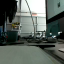

In [ ]:
from zumi.util.camera import Camera
from PIL import Image
import IPython.display

camera = Camera(64, 64)
camera.start_camera()

try: 
    while True:
        frame = camera.capture()
        img = Image.fromarray(frame)
        x = np.expand_dims(img, axis=0)
        preds = model.predict_classes(x)
        prob = model.predict_proba(x)
        print(preds, " prob", prob)
        IPython.display.display(img)
        IPython.display.clear_output(wait=True) 
finally:
    camera.close()
    print("done")